# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    confusion_matrix,
    make_scorer,
)
from sklearn.model_selection import GridSearchCV

## Loading the dataset

In [6]:
df = pd.read_csv('Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Data Overview

* Observations
* Sanity checks

In [7]:
df.info()
print(" \nCount total NaN at each column in DataFrame : \n\n",
      df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
 
Count total NaN at each column in DataFrame : 

 ID   

**Observation**: No missing Data

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

1.
What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

<Axes: ylabel='Mortgage'>

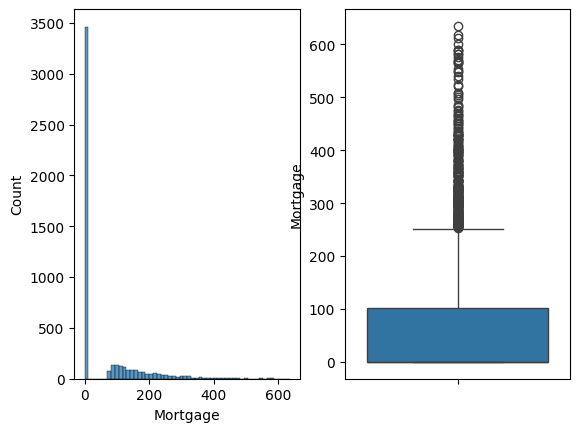

In [8]:
fig, axs = plt.subplots(ncols=2)
sns.histplot(df['Mortgage'], ax=axs[0])
sns.boxplot(df['Mortgage'], ax=axs[1])



*   We can notice that the histogram is skewed to the right
*   Most mortgage are less than $100,000
*   No outliers





2. How many customers have credit cards?

In [9]:
df.CreditCard.value_counts()
print("1470 customers have credit cards")

1470 customers have credit cards


3. What are the attributes that have a strong correlation with the target attribute (personal loan)?

In [10]:
df.corr()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.002240,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.030530,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.030456,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.030709,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.002240,-0.030530,-0.030456,-0.030709,1.000000,0.027512,-0.012188,-0.008266,0.003614,-0.002974,0.002422,0.021671,0.028317,0.024033
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.027512,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.012188,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.008266,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.003614,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.024801,-0.007726,-0.007413,0.502462,-0.002974,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


The attributes that have a strong correlation with the target attribute (personal loan) are:

*  Income (0.502462)
*  CCAvg (0.366889)



4. How does a customer's interest in purchasing a loan vary with their age?

In [11]:
df.groupby(['Personal_Loan'])[['Age']].mean()

,Age
Personal_Loan,
0,45.367257
1,45.066667




*   Based on the correlation, we can notice that Age does not significantly affect customer's interest in purchasing a loan
*   We also notice that the average age is almost the same in customers who have interest purchasing a loan compared to customers with no interest.
*   Conclusion :  a customer's interest in purchasing a loan does not vary with their age






5. How does a customer's interest in purchasing a loan vary with their education?

In [12]:
df.groupby(['Personal_Loan'])[['Education']].value_counts()

Personal_Loan  Education
0              1            2003
               3            1296
               2            1221
1              3             205
               2             182
               1              93
Name: count, dtype: int64

*   Based on the correlation, we can notice that Education slightly affect customer's interest in purchasing a loan.
*   We notice that customers with advanced/professional education are more likely to have interest in purchasing a loan.
*   Conclusion :  a customer's interest in purchasing a loan vary with their education. The more educated the customer is, the more likely he is to have interest in purchasing the loan.




## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [13]:
X= df.drop('Personal_Loan', axis = 1)
Y= df.pop('Personal_Loan')

## Model Building

### Model Evaluation Criterion

*


### Model Building

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1, test_size=.30)
dTree = DecisionTreeClassifier()
dTree.fit(X_train,Y_train)
print("Accuracy on the training set: ",dTree.score(X_train,Y_train))
print("Accuracy on the testing set: ", dTree.score(X_test,Y_test))

Accuracy on the training set:  1.0
Accuracy on the testing set:  0.9806666666666667


<Axes: xlabel='Personal_Loan', ylabel='Count'>

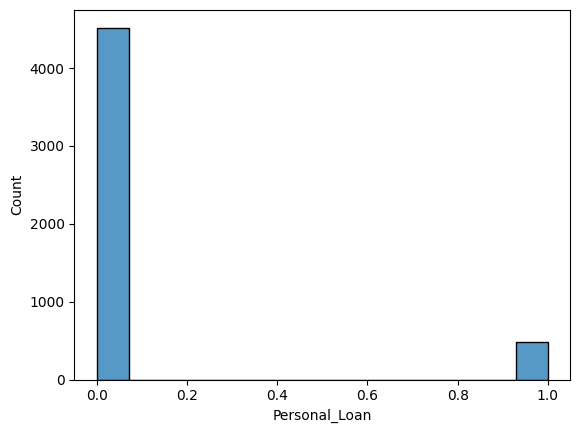

In [15]:
sns.histplot(Y)

We can see that it is imbalanced, therefore accuracy would not be an approriate metric. We will use recall to evaluate here.

In [16]:
Y.sum(axis=0)

480

We have 480 positives and 4520 negatives.
It looks like accuracy is not a good metric to evaluate here

In [17]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):


    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [18]:
def confusion_matrix_sklearn(model, predictors, target):

    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

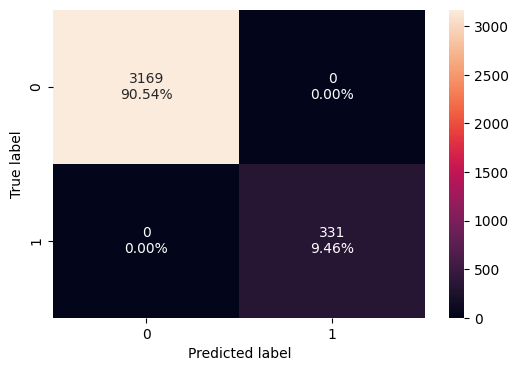

In [19]:
confusion_matrix_sklearn(dTree, X_train, Y_train)

### Model Performance Improvement

## Model Comparison and Final Model Selection

# Model 1

In [20]:

model1 = DecisionTreeClassifier(class_weight='balanced', max_depth=1, random_state=1)
model1.fit(X_train,Y_train)
decision_tree_perf_train = model_performance_classification_sklearn(
    model1,X_train,Y_train
)
model1.fit(X_test,Y_test)
decision_tree_perf_test = model_performance_classification_sklearn(
    model1,X_test,Y_test
)
print("results on training data : \n",decision_tree_perf_train)
print("results on test data : \n", decision_tree_perf_test)

results on training data : 
    Accuracy    Recall  Precision   F1
0  0.819429  0.954683   0.338692  0.5
results on test data : 
    Accuracy    Recall  Precision        F1
0  0.814667  0.926174   0.340741  0.498195


It is overfitted.

# Model 2

In [21]:

model2 = DecisionTreeClassifier(max_depth=3, random_state=1)
model2.fit(X_train,Y_train)
decision_tree_perf_train = model_performance_classification_sklearn(
    model2,X_train,Y_train
)
model2.fit(X_test,Y_test)
decision_tree_perf_test = model_performance_classification_sklearn(
    model2,X_test,Y_test
)
print("results on training data : \n",decision_tree_perf_train)
print("results on test data : \n", decision_tree_perf_test)

results on training data : 
    Accuracy    Recall  Precision        F1
0  0.982286  0.812689        1.0  0.896667
results on test data : 
    Accuracy    Recall  Precision        F1
0  0.982667  0.845638   0.976744  0.906475


Higher precision and higher accuracy in the training data means that the model does not perform well on new examples therefore it is overfitted to the training data.

# Model 3

In [22]:
model3 = DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=79, random_state=1)
model3.fit(X_train,Y_train)
decision_tree_perf_train = model_performance_classification_sklearn(
    model3,X_train,Y_train
)
model3.fit(X_test,Y_test)
decision_tree_perf_test = model_performance_classification_sklearn(
    model3,X_test,Y_test
)
print("results on training data : \n",decision_tree_perf_train)
print("results on test data : \n", decision_tree_perf_test)

results on training data : 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
results on test data : 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


The results look inaccurate therefore it is not a good model.

# Best Model estimator


In [23]:
# Type of classifier
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2,7,2),
    "max_leaf_nodes":[50,75,150,250],
    "min_samples_split": [10,30,50,70],

}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train,Y_train)

# Set the clf for the best parameters combinations
estimator = grid_obj.best_estimator_

# fit the best algorithm to the data
estimator.fit(X_train,Y_train)



DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

In [24]:
Final_model = DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)
Final_model.fit(X_train,Y_train)
decision_tree_perf_train = model_performance_classification_sklearn(
    Final_model,X_train,Y_train
)
Final_model.fit(X_test,Y_test)
decision_tree_perf_test = model_performance_classification_sklearn(
    Final_model,X_test,Y_test
)
print("results on training data : \n",decision_tree_perf_train)
print("results on test data : \n", decision_tree_perf_test)

results on training data : 
    Accuracy  Recall  Precision        F1
0  0.790286     1.0   0.310798  0.474212
results on test data : 
    Accuracy  Recall  Precision        F1
0  0.791333     1.0   0.322511  0.487725




*   Accuracy is slightly different on the training and testing set.
*   Recall is the same on the training and testing set.
*   Precision is slightly different on the training and testing set.
*   F1 score is slightly different on the training and testing set.

**Conclusion**: We have the final and best model here.





We will plot the tree to have a better understanding/insights on the data.

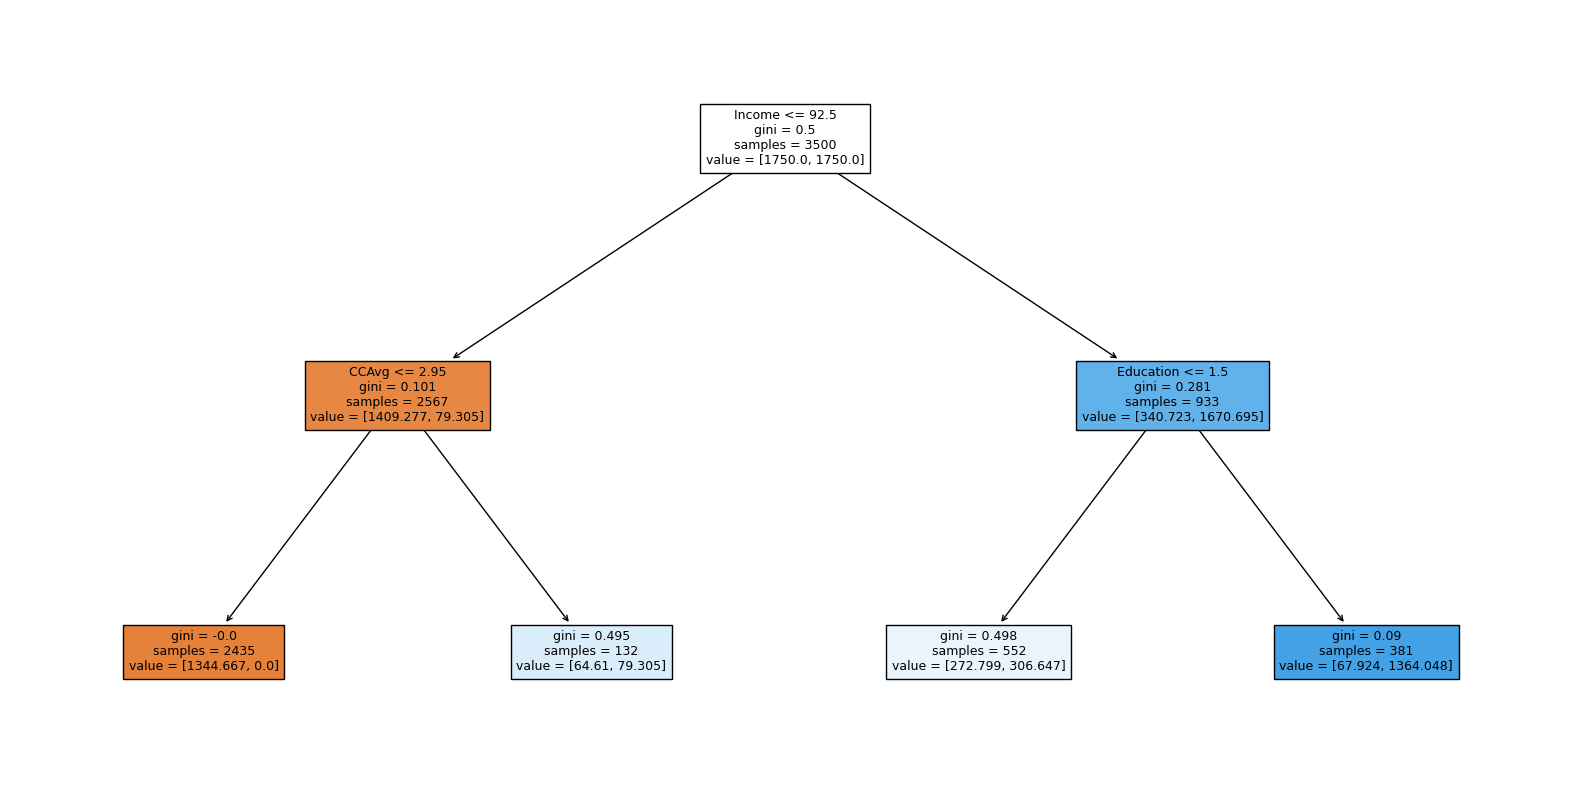

In [25]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?



*   If the income is less or equal to 92.5, CCAvg is more than 2.95, then a liability customer will not buy personal loans.
*   If the income is more than 92.5, Education is Undergraduate, then a liability customer will not buy personal loans.
*   The bank should focus on liability customers with an income less or equal to 92.5, CCAvg is less or equal to 2.95. They are more likely to buy a personal loan.
*   The bank should focus on liability customers with an income more than 92.5, Education between Graduate and Advanced/Professional. They are more likely to buy a personal loan.





In [26]:
# Convert to HTML
!pip install nbconvert
!jupyter nbconvert --to html Personal Loan Campaign Project.ipynb

[NbConvertApp] WARNING | pattern 'Personal' matched no files
[NbConvertApp] WARNING | pattern 'Loan' matched no files
[NbConvertApp] WARNING | pattern 'Campaign' matched no files
[NbConvertApp] WARNING | pattern 'Project.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file


___